# Data Immersion Task 6.5 - Unsupervised Machine Learning

### Table of Contents

#### 1. Importing Libraries and Data
#### 2. Data preprocessing
    ##### 2a. Cleaning and Wrangling Data
    ##### 2b. Standardizing Data
    ##### 2c. Reducing Dimensionality with Principal Component Analysis
#### 3. K-Means Clustering
    ##### 3a. Examining Data with Elbow Technique
    ##### 3b. k-means Clustering
    ##### 3c. k-means Results Plotting
    ##### 3d. Descriptive Statistics of k-means Clusters

## 1. Importing Libraries and Data

In [75]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # importing KMeans algorithm
from sklearn.preprocessing import StandardScaler # Used for scaling my data
from sklearn.decomposition import PCA # in case I want to reduce the dimensionality (too many columns) of my data
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
import plotly.express as px # I want to try those 3D graphs
import plotly.graph_objects as go # So I can adjust the 3D graph elements
import plotly.io as pio

In [3]:
# making my graphs display inline without having to "call" them:

%matplotlib inline

In [9]:
# Set the maximum number of columns to be displayed
pd.set_option('display.max_columns', None)

In [4]:
# Setting my data path:

path=r'D:\Adam\Employment\Data Analysis Course\Final Data Project'

In [5]:
# Importing data:

# - Realtor.com Historical Inventory by zip
df_rh = pd.read_csv(os.path.join(path, 'Data', 'Cleaned', 'Realtor_Historical_FoodZips.csv'), index_col = False)

## 2. Data pre-processing

In [7]:
# Getting basic stats on my dataframe as-is for consideration of pre-processing

df_rh.shape

(17058, 25)

In [10]:
# Getting basic stats on my dataframe as-is

df_rh.head()

month_date_yyyymm  postal_code   city state  median_listing_price  \
0             202303        71944  grannis, ar              231950.0   
1             202302        71944  grannis, ar              304900.0   
2             202301        71944  grannis, ar              304900.0   
3             202212        71944  grannis, ar              304900.0   
4             202211        71944  grannis, ar              324900.0   

   median_listing_price_yy  active_listing_count  active_listing_count_yy  \
0                      NaN                   2.0                      NaN   
1                      NaN                   1.0                      NaN   
2                      NaN                   1.0                      NaN   
3                   1.6513                   1.0                      0.0   
4                   1.8252                   1.0                      0.0   

   new_listing_count  new_listing_count_yy  \
0                0.0                   NaN   
1                0.0                   NaN   
2                0.0                   NaN   
3                0.0                   NaN   
4                0.0                  -1.0   

   median_listing_price_per_square_foot  \
0                                 150.0   
1                                 157.0   
2                                 157.0   
3                                 157.0   
4                                 167.0   

   median_listing_price_per_square_foot_yy  median_square_feet  \
0                                      NaN              1530.0   
1                                      NaN              1944.0   
2                                      NaN              1944.0   
3                                   0.7021              1944.0   
4                                   0.8137              1944.0   

   median_square_feet_yy  average_listing_price  average_listing_price_yy  \
0                    NaN               231950.0                       NaN   
1                    NaN               304900.0                       NaN   
2                    NaN               304900.0                       NaN   
3                 0.5577               304900.0                    1.6513   
4                 0.5577               324900.0                    1.8252   

   total_listing_count  total_listing_count_yy  quality_flag    Zip  TysonZip  \
0                  2.0                     NaN           0.0  71944     71944   
1                  1.0                     NaN           0.0  71944     71944   
2                  1.0                     0.0           0.0  71944     71944   
3                  1.0                     0.0           1.0  71944     71944   
4                  1.0                     0.0           1.0  71944     71944   

  state       lat       lng  county_fips county_name  
0    AR  34.23922 -94.32517         5113        Polk  
1    AR  34.23922 -94.32517         5113        Polk  
2    AR  34.23922 -94.32517         5113        Polk  
3    AR  34.23922 -94.32517         5113        Polk  
4    AR  34.23922 -94.32517         5113        Polk

In [ ]:
print(df.columns.tolist())

### 2a. Cleaning and Wrangling Data

In [11]:
# Dropping categorical and other non-useful variables (including all year-over-year columns)

df_rh.drop(['month_date_yyyymm', 'postal_code', 'city state', 'median_listing_price_yy', 'active_listing_count_yy', 'new_listing_count_yy', 'median_listing_price_per_square_foot_yy', 'median_square_feet_yy', 'average_listing_price_yy', 'total_listing_count_yy', 'quality_flag', 'Zip', 'TysonZip', 'state', 'lat', 'lng', 'county_fips' ,'county_name'], axis=1, inplace=True)

In [12]:
df_rh.head()

median_listing_price  active_listing_count  new_listing_count  \
0              231950.0                   2.0                0.0   
1              304900.0                   1.0                0.0   
2              304900.0                   1.0                0.0   
3              304900.0                   1.0                0.0   
4              324900.0                   1.0                0.0   

   median_listing_price_per_square_foot  median_square_feet  \
0                                 150.0              1530.0   
1                                 157.0              1944.0   
2                                 157.0              1944.0   
3                                 157.0              1944.0   
4                                 167.0              1944.0   

   average_listing_price  total_listing_count  
0               231950.0                  2.0  
1               304900.0                  1.0  
2               304900.0                  1.0  
3               304900.0                  1.0  
4               324900.0                  1.0

In [18]:
# Check for null values

df_rh.isnull().sum()

median_listing_price                    26
active_listing_count                    18
new_listing_count                       15
median_listing_price_per_square_foot    40
median_square_feet                      39
average_listing_price                   26
total_listing_count                     15
dtype: int64

In [19]:
# dropping nulls so I can run my analysis later down:

df_rh = df_rh.dropna()

In [20]:
df_rh.isnull().sum()

median_listing_price                    0
active_listing_count                    0
new_listing_count                       0
median_listing_price_per_square_foot    0
median_square_feet                      0
average_listing_price                   0
total_listing_count                     0
dtype: int64

### 2b. Standarizing Data

In [21]:
# The variance in the numbers of my different types of variables is too different, so they need to be standardized

scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_rh)

In [22]:
print(segmentation_std)

[[-0.06970461 -0.74928186 -0.78563353 ... -0.63220619 -0.22728104
  -0.78463042]
 [ 0.2806662  -0.76767388 -0.78563353 ... -0.00917996  0.05030811
  -0.79698376]
 [ 0.2806662  -0.76767388 -0.78563353 ... -0.00917996  0.05030811
  -0.79698376]
 ...
 [-0.75147482 -0.76767388 -0.78563353 ... -1.42227569 -0.76742882
  -0.79698376]
 [-0.75147482 -0.76767388 -0.78563353 ... -1.42227569 -0.76742882
  -0.79698376]
 [-0.75147482 -0.76767388 -0.63285549 ... -1.42227569 -0.76742882
  -0.79698376]]


### 2c. Reducting Dimensionality with Principal Component Analysis

In [23]:
# Considering reducing the dimensionality (number of variables) using Principal Component Analysis

# Fit standardized data using PCA

pca = PCA()
pca.fit(segmentation_std)

PCA()

In [24]:
# Seeing how much variance is explained by each of the components

pca.explained_variance_ratio_

array([0.52952703, 0.28642579, 0.11128702, 0.03406318, 0.0259003 ,
       0.00808772, 0.00470896])

Text(0, 0.5, 'Cumulative Explained Variance')

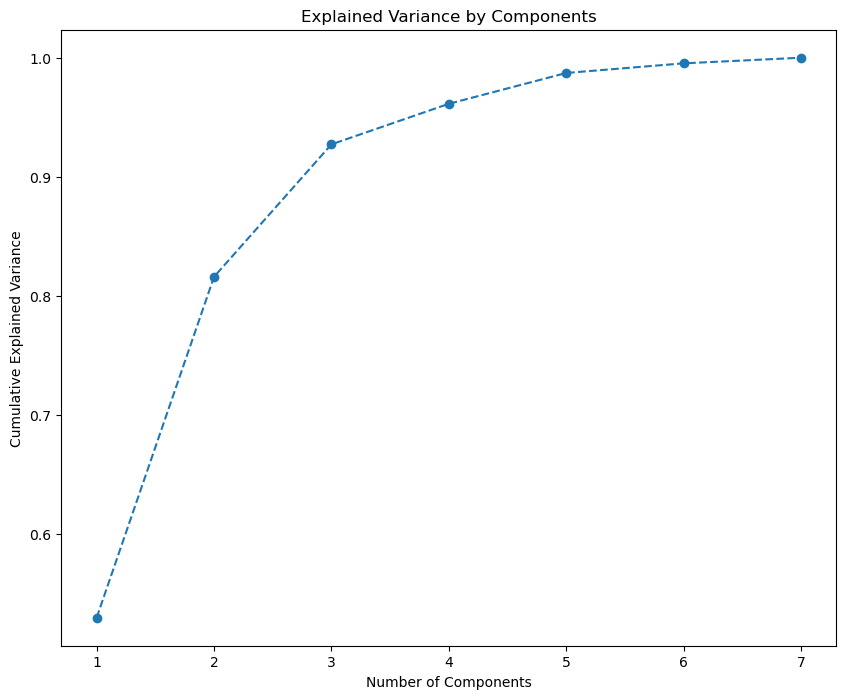

In [25]:
plt.figure(figsize = (10,8))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

I'm going to choose 3 components, because it keeps over 90% of the variance and seems to have that nice elbow feature too

In [26]:
# Choice of three components based on the above findings

pca = PCA(n_components = 3)

In [27]:
# Fit model to data

pca.fit(segmentation_std)

PCA(n_components=3)

In [28]:
# Extracting the resulting calculated components for the data set

pca.transform(segmentation_std)

array([[-1.07038774,  0.89668928, -0.66438235],
       [-0.58150082,  1.31041403, -0.24550492],
       [-0.58150082,  1.31041403, -0.24550492],
       ...,
       [-2.13906345,  0.00899506, -0.73888551],
       [-2.13906345,  0.00899506, -0.73888551],
       [-2.08056373, -0.05083039, -0.75057134]])

In [30]:
# Establishing these values as "scores_pca"

scores_pca = pca.transform(segmentation_std)

## 3. K-Means Clustering

### 3a. Examining Data with Elbow Technique

In [31]:
# Defining the range of potential clusters and defining k-means clusters

num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]  # defining KMeans clusters for the range specified above

In [32]:
# Defining a score for the rate of variation per number of cluseters within the range above

score = [kmeans[i].fit(scores_pca).score(scores_pca) for i in range(len(kmeans))]

score

[-110458.3726124711,
 -70097.56815744005,
 -53993.22923040418,
 -45413.937475735445,
 -39408.746109871034,
 -35420.08962411504,
 -31908.94243919162,
 -29073.29516870582,
 -26478.3089271415]

I'd say just from the numbers it looks like my elbow is going to be around the 3rd or 4th set of clusters

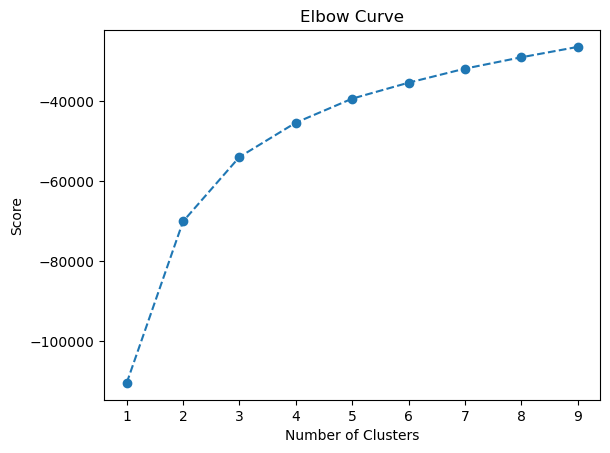

In [33]:
# Plotting the elbow curve using pylab

pl.plot(num_cl,score, marker = 'o', linestyle = '--')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title ('Elbow Curve')
pl.show()

Looks like I'll keep just 3 clusters. It never really straightens out, but because mostly straight with the same slope after 3.  I could also consider doing 4, but I'll choose 3 for now and see how it goes.

### 3b. k-means Clustering

In [34]:
# Creating the k-means object

kmeans = KMeans(n_clusters = 3)

In [35]:
# Fitting my earlier formatted dataframe to the kmeans algorithm (after standardization and principal component analysis)

kmeans.fit(scores_pca)

KMeans(n_clusters=3)

In [36]:
# Adding my PCA scores and k-means labels to my dataframe's original values

df_pca_kmeans = pd.concat([df_rh.reset_index(drop=True),pd.DataFrame(scores_pca)], axis = 1)
df_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']  # this is because I had 3 components after
# I did my PCA above
df_pca_kmeans['Segment k-means PCA'] = kmeans.labels_  # These are the clusters assigned by the k-means algorithm

# displaying my new columns
df_pca_kmeans.head()

median_listing_price  active_listing_count  new_listing_count  \
0              231950.0                   2.0                0.0   
1              304900.0                   1.0                0.0   
2              304900.0                   1.0                0.0   
3              304900.0                   1.0                0.0   
4              324900.0                   1.0                0.0   

   median_listing_price_per_square_foot  median_square_feet  \
0                                 150.0              1530.0   
1                                 157.0              1944.0   
2                                 157.0              1944.0   
3                                 157.0              1944.0   
4                                 167.0              1944.0   

   average_listing_price  total_listing_count  Component 1  Component 2  \
0               231950.0                  2.0    -1.070388     0.896689   
1               304900.0                  1.0    -0.581501     1.310414   
2               304900.0                  1.0    -0.581501     1.310414   
3               304900.0                  1.0    -0.581501     1.310414   
4               324900.0                  1.0    -0.461480     1.421132   

   Component 3  Segment k-means PCA  
0    -0.664382                    0  
1    -0.245505                    0  
2    -0.245505                    0  
3    -0.245505                    0  
4    -0.335242                    0

In [37]:
# Creating a new column to label my k-means clusters

df_pca_kmeans['clusters'] = df_pca_kmeans['Segment k-means PCA'].map({0: 'first', 
                                                                    1: 'second', 
                                                                    2: 'third'})

In [38]:
# Counting the number of observations in each cluster:

df_pca_kmeans['clusters'].value_counts()

first     13414
second     2986
third       618
Name: clusters, dtype: int64

Hmmm... interesting... first cluster is very large, second is 5 times smaller, and third is 5 times smaller again. Will be interesting when I visualize them

### 3c. k-means Results Plotting

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


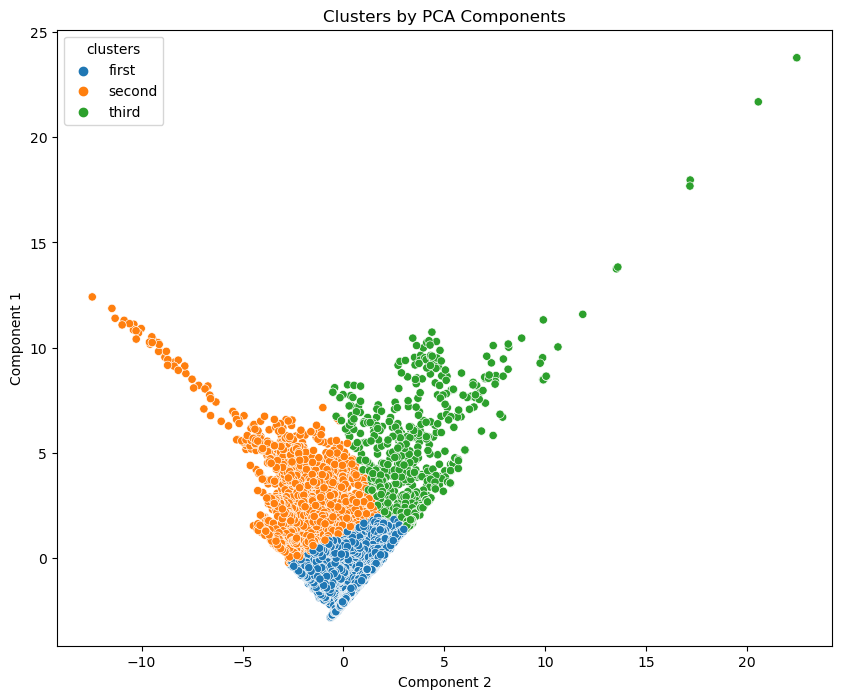

In [39]:
# First I'm going to plot my clusters as PCA components to see how distinct they appear:

x_axis = df_pca_kmeans['Component 2']
y_axis = df_pca_kmeans['Component 1']
plt.figure(figsize= (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_pca_kmeans['clusters'])
plt.title('Clusters by PCA Components')
plt.show()

Haha, that's weird!  It's a fun shape, but the clustering looks arbitrary, not too obvious why they should divide in that middle area.

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


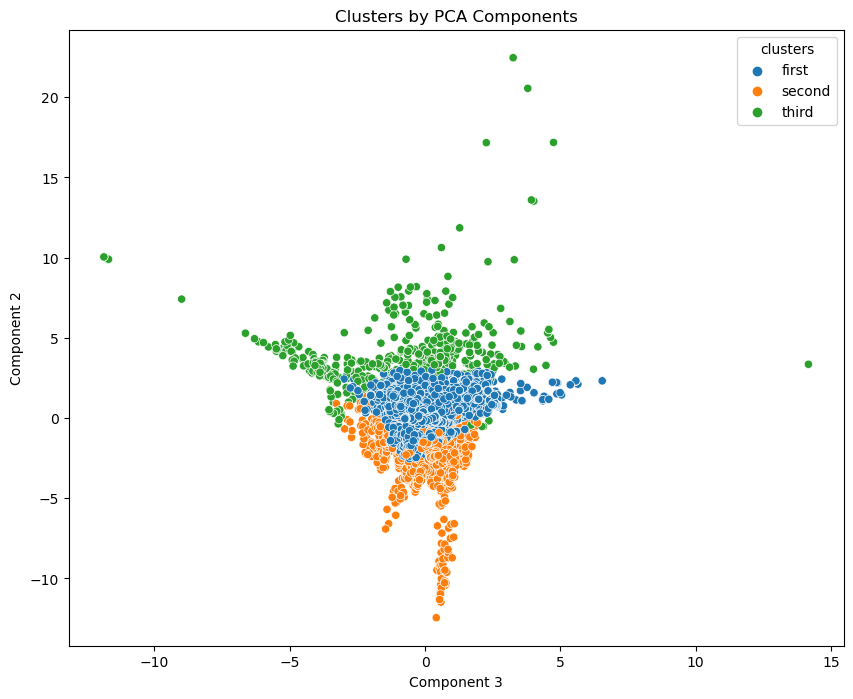

In [40]:
# I'm going to try plotting the other PCA component to see if that helps:

x_axis = df_pca_kmeans['Component 3']
y_axis = df_pca_kmeans['Component 2']
plt.figure(figsize= (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_pca_kmeans['clusters'])
plt.title('Clusters by PCA Components')
plt.show()

Still funny looking with apparently arbitrary divisions where each group meets together (and more overlap here). Maybe if I do it 3D it'll look better clustered?

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


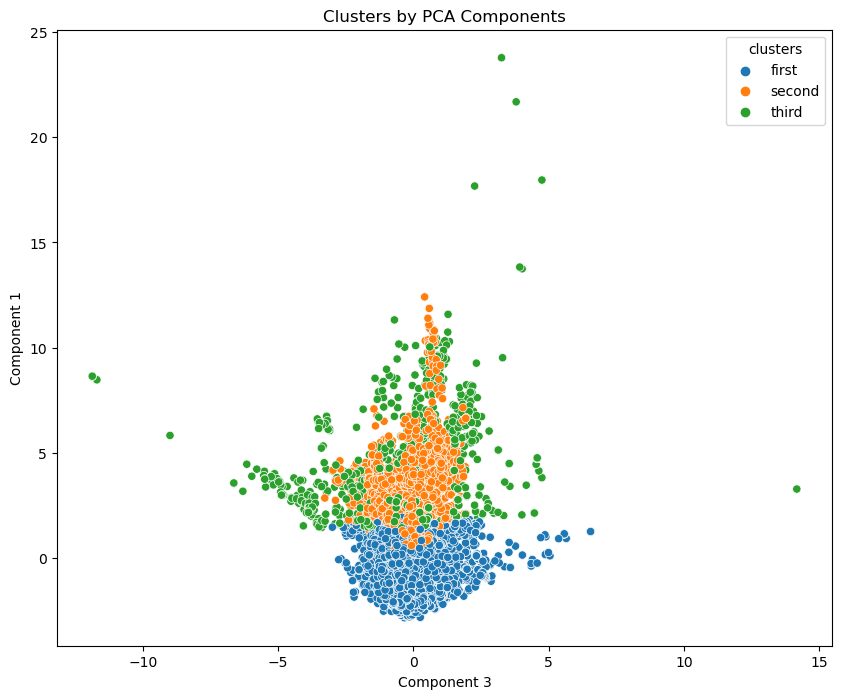

In [41]:
# Trying to graph 1st and 3rd component together:

x_axis = df_pca_kmeans['Component 3']
y_axis = df_pca_kmeans['Component 1']
plt.figure(figsize= (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_pca_kmeans['clusters'])
plt.title('Clusters by PCA Components')
plt.show()

In [61]:
# Creating a 3d scatterplot of the 3 PCA components with plotly

fig = px.scatter_3d(df_pca_kmeans, x='Component 1', y='Component 2', z='Component 3', color='clusters')

# Increase the size of the dots in the legend
fig.update_traces(marker=dict(size=4))

# Increase the size of the dots in the legend
fig.update_traces(marker=dict(size=2))

# Add separate scatter traces for the custom legend
legend_trace_1 = go.Scatter3d(
    x=[None],
    y=[None],
    z=[None],
    mode='markers',
    marker=dict(color='blue', size=8),
    name='first'
)

legend_trace_2 = go.Scatter3d(
    x=[None],
    y=[None],
    z=[None],
    mode='markers',
    marker=dict(color='red', size=8),
    name='second'
)

legend_trace_3 = go.Scatter3d(
    x=[None],
    y=[None],
    z=[None],
    mode='markers',
    marker=dict(color='green', size=8),
    name='third'
)

# Add the legend traces to the figure
fig.add_trace(legend_trace_1)
fig.add_trace(legend_trace_2)
fig.add_trace(legend_trace_3)

fig.show()

Based on this 3D graph, I could say that blue (first cluster) represents the main body of typical points with almost no outliers.  Whereas green and red represent the way the data stretches in each different direction including all the outliers.  Maybe when I plot these with the original variables (not the PCA components) it'll be clear which cluster better describes which variable's outliers.

In [66]:
# Listing columns for easy access when I change up my 2D graphs

print(df_pca_kmeans.columns.tolist())

['median_listing_price', 'active_listing_count', 'new_listing_count', 'median_listing_price_per_square_foot', 'median_square_feet', 'average_listing_price', 'total_listing_count', 'Component 1', 'Component 2', 'Component 3', 'Segment k-means PCA', 'clusters']


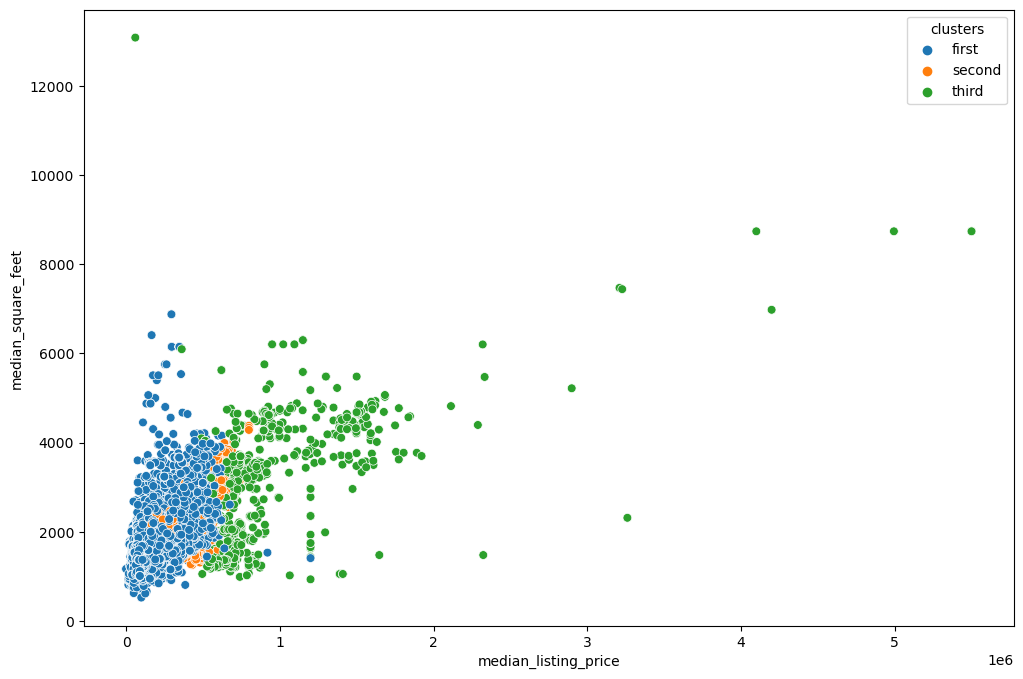

In [65]:
# Plot clusters for different variables, trying various combinations

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_pca_kmeans['median_listing_price'], y=df_pca_kmeans['median_square_feet'], hue=df_pca_kmeans['clusters'], s=40)

# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

plt.xlabel('median_listing_price')
plt.ylabel('median_square_feet')
plt.show()

Weird how in this one I can't even hardly see the orange values.  But I can see that green cluseter is the more expensive one and blue cluster is the lower-priced one.

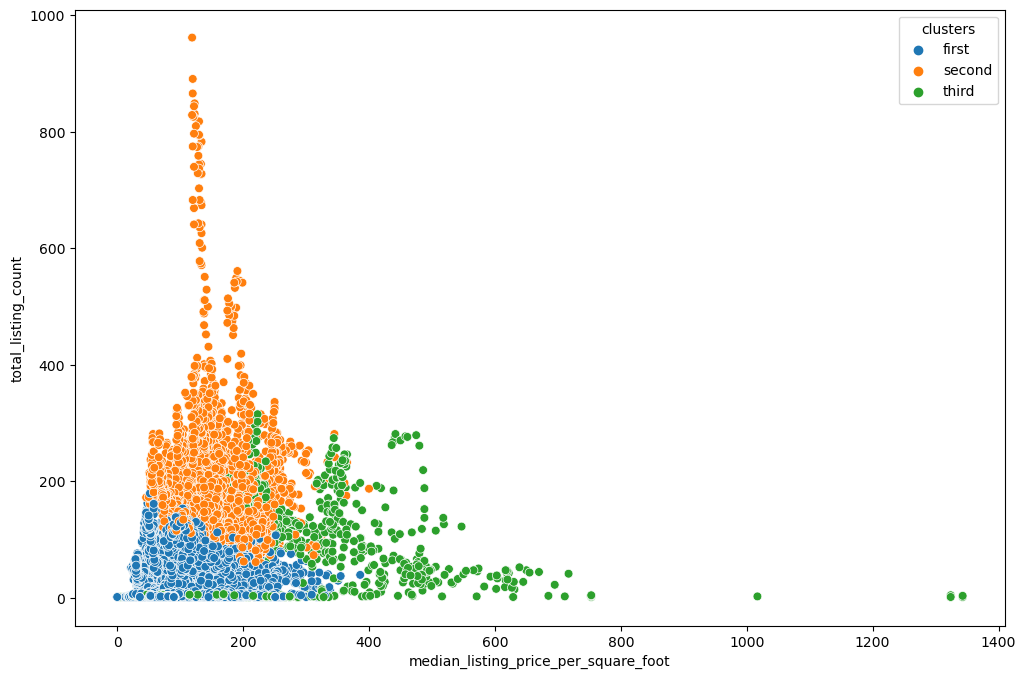

In [67]:
# Plot clusters for different variables, trying various combinations

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_pca_kmeans['median_listing_price_per_square_foot'], y=df_pca_kmeans['total_listing_count'], hue=df_pca_kmeans['clusters'], s=40)

# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

plt.xlabel('median_listing_price_per_square_foot')
plt.ylabel('total_listing_count')
plt.show()

This is slightly interesting.  Blue are lower cost homes apparently in markets without a ton of homes available. Orange (second) are homes of average price but in markets with lots of homes available. Green are homes that are very expensive but those markets don't tend to have that many listings.

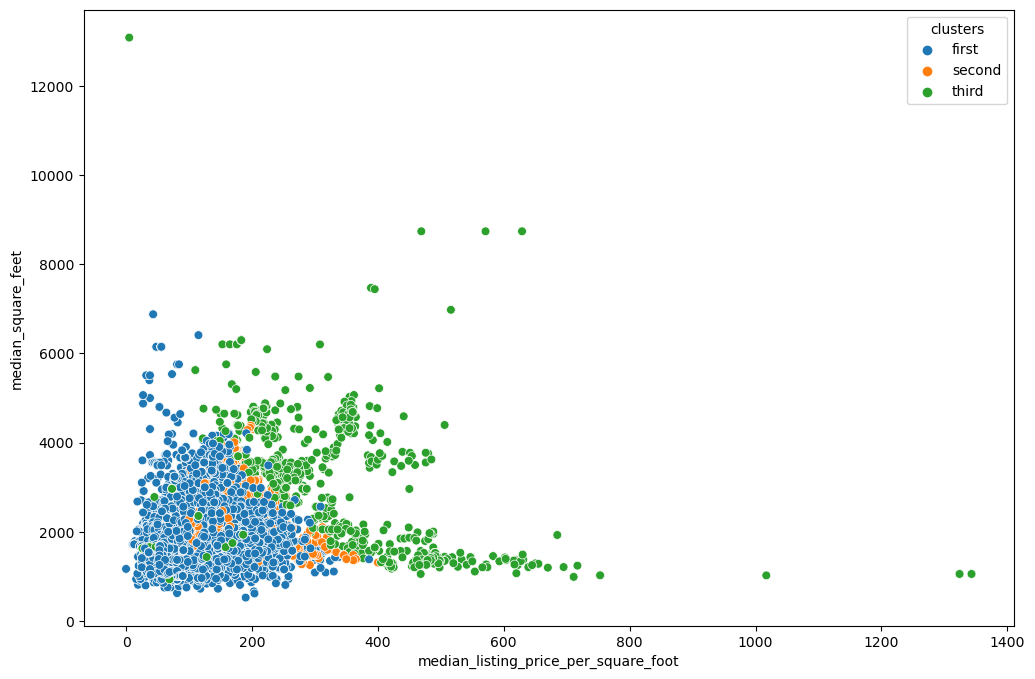

In [68]:
# Plot clusters for different variables, trying various combinations

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_pca_kmeans['median_listing_price_per_square_foot'], y=df_pca_kmeans['median_square_feet'], hue=df_pca_kmeans['clusters'], s=40)

# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

plt.xlabel('median_listing_price_per_square_foot')
plt.ylabel('median_square_feet')
plt.show()

The shape of this is different than my first graph, but the clustering is the same.  I need to see if I can do a pairplot with colors

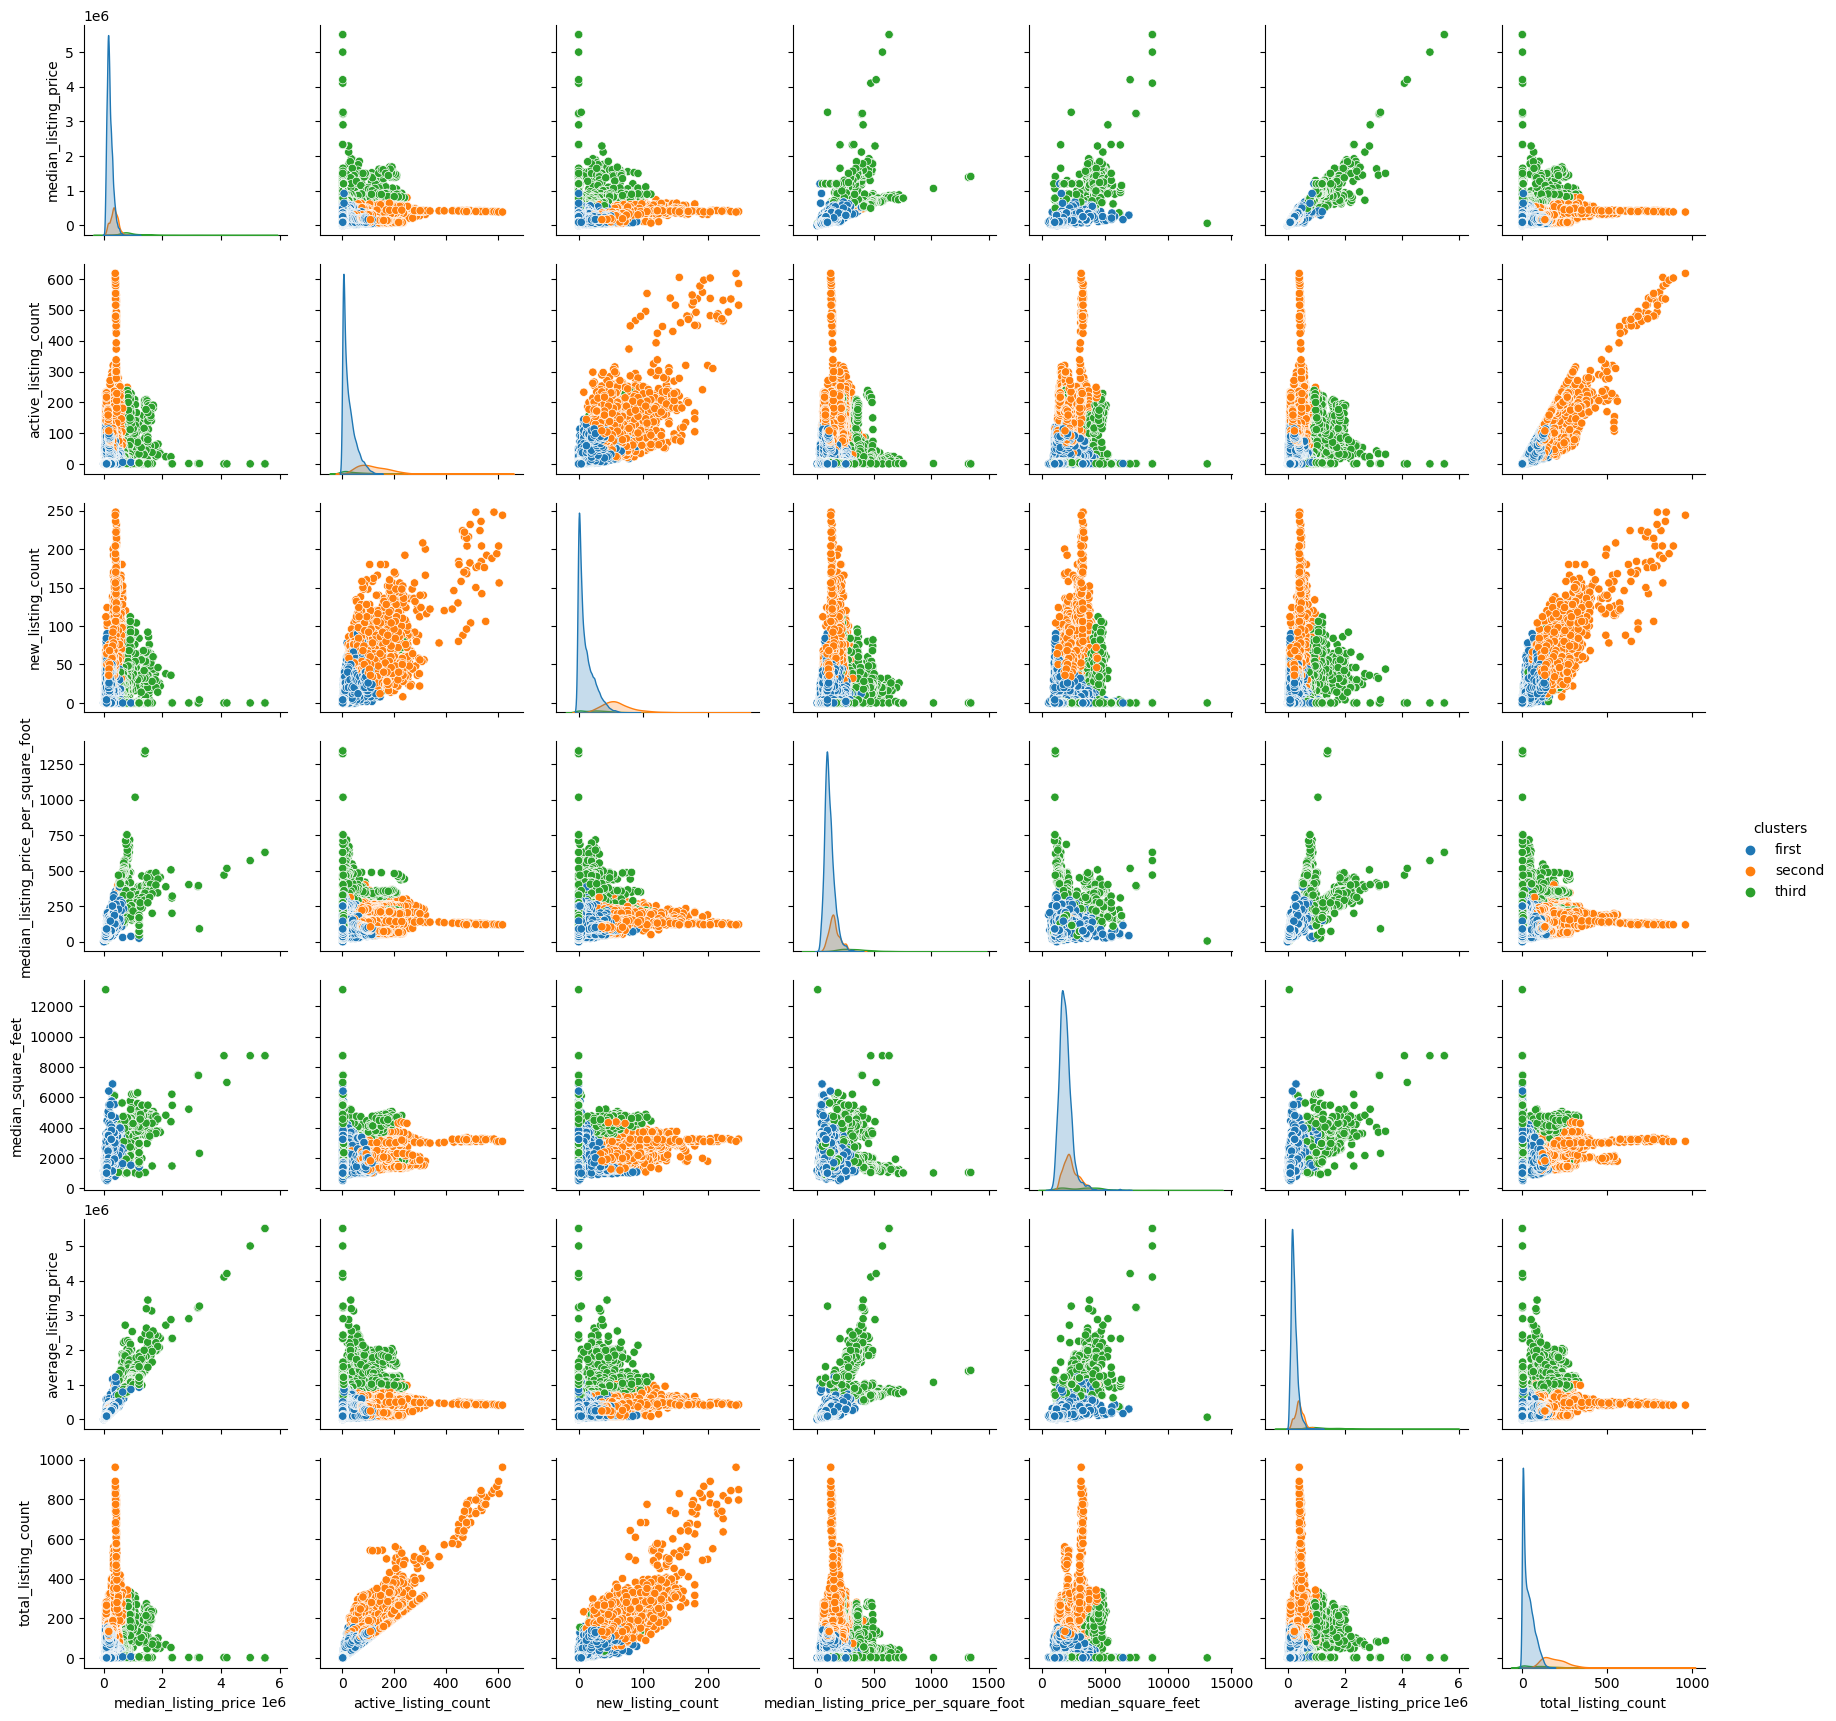

In [69]:
# Creating a pairplot with all my variables with my clusters displayed in the colors.
# That way I can see it all at once without having to keep redoing all of this.

sns.pairplot(data=df_pca_kmeans, vars=['median_listing_price', 'active_listing_count', 'new_listing_count', 'median_listing_price_per_square_foot', 'median_square_feet', 'average_listing_price', 'total_listing_count'], hue='clusters')

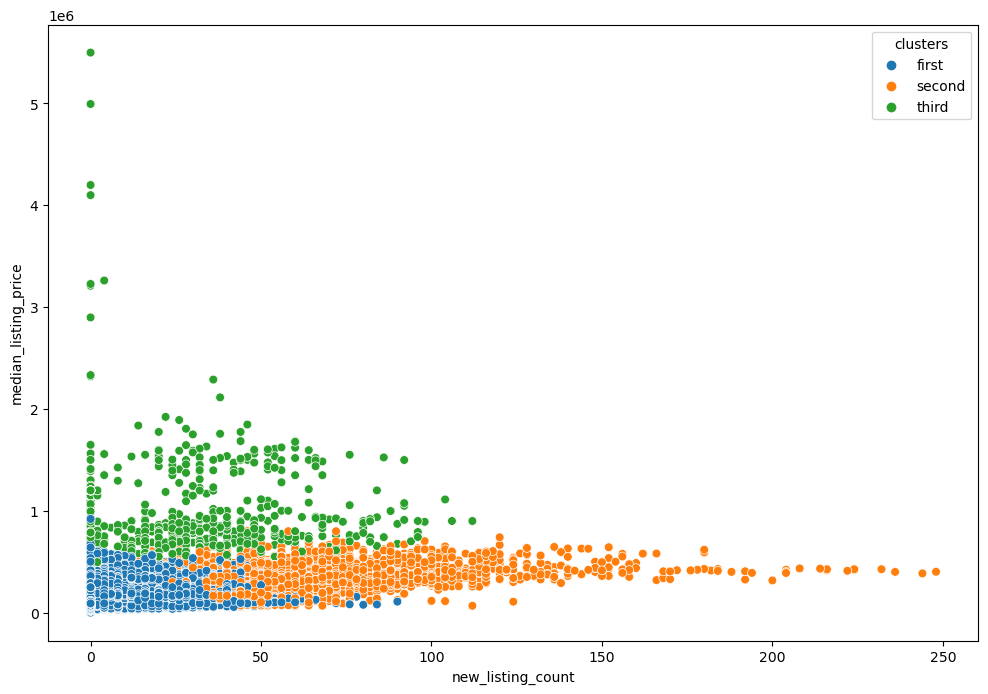

In [70]:
# Plot clusters for different variables, trying various combinations

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_pca_kmeans['new_listing_count'], y=df_pca_kmeans['median_listing_price'], hue=df_pca_kmeans['clusters'], s=40)

# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

plt.xlabel('new_listing_count')
plt.ylabel('median_listing_price')
plt.show()

Thanks to my pair plot, I foun dsomething interesting.  All locations with largest numbers of new listings have happened when the median listing price is relatively low. When median listing price gets really high, there aren't many new listings.

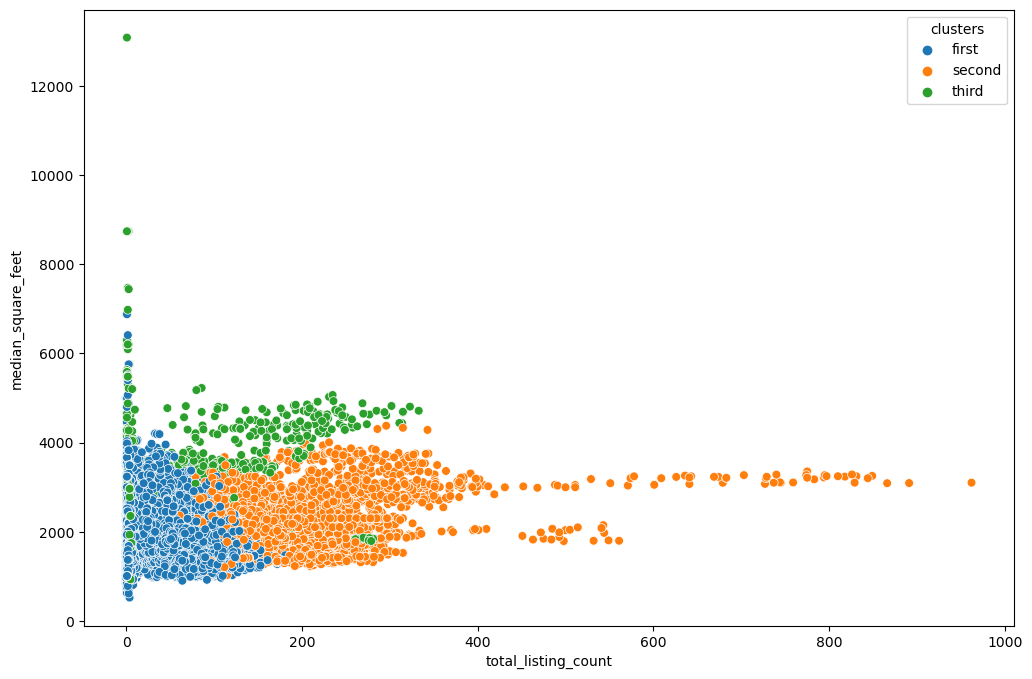

In [71]:
# Plot clusters for different variables, trying various combinations

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_pca_kmeans['total_listing_count'], y=df_pca_kmeans['median_square_feet'], hue=df_pca_kmeans['clusters'], s=40)

# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

plt.xlabel('total_listing_count')
plt.ylabel('median_square_feet')
plt.show()

This wasn't as interesting as I was hoping it'd be. Smaller/average sized homes are the ones that happen when total listing count is high.  Larger homes only happen in places with more limited numbers of homes. That's basically what I learned in the scatterplot above.  I think all of these efforts would be better if I weren't looking at aggregaged per market info, but instead were looking at disaggregated home info.  Which I'll do when I use my scraped data.  So maybe next time I'll try to rerun these with that info.

In [72]:
# Creating a 3d scatterplot of the median listing price, median square feet, and total listing count

fig = px.scatter_3d(df_pca_kmeans, x='median_listing_price', y='median_square_feet', z='total_listing_count', color='clusters')

# Increase the size of the dots in the legend
fig.update_traces(marker=dict(size=4))

# Increase the size of the dots in the legend
fig.update_traces(marker=dict(size=2))

# Add separate scatter traces for the custom legend
legend_trace_1 = go.Scatter3d(
    x=[None],
    y=[None],
    z=[None],
    mode='markers',
    marker=dict(color='blue', size=8),
    name='first'
)

legend_trace_2 = go.Scatter3d(
    x=[None],
    y=[None],
    z=[None],
    mode='markers',
    marker=dict(color='red', size=8),
    name='second'
)

legend_trace_3 = go.Scatter3d(
    x=[None],
    y=[None],
    z=[None],
    mode='markers',
    marker=dict(color='green', size=8),
    name='third'
)

# Add the legend traces to the figure
fig.add_trace(legend_trace_1)
fig.add_trace(legend_trace_2)
fig.add_trace(legend_trace_3)

fig.show()

This 3D graph is interesting and I think very helpful to see how the clusters differentiate.  It might be better if I removed some of the biggest values to make it easier to zoom and pan in this. But regardless, this is what it helps me see:

* The blue (first) cluster is the greatest number of markets (maybe "typical"), having median listing prices rarely approaching 500k dollars, median square feet mostly less than 4000 (though occasionally hitting past 6k), and total listing counts don't really go above 200.
* The red (second) cluster are "hot" markets, with number of listings sometimes approaching 1000, but pretty much never exceeding 4000 square feet (and more often clustered at just short of 2000 square feet and about 3000 square feet), and never exceeding the price of the blue market (< ~500k dollars)
* The green (third) cluster are the "wealthy" markets. They have increasingly high median_square_feet and median listing prices that go into the millions. But there rarely any markets with more than a couple hundred of those. They're never really "hot" markets.


In [73]:
# Using what I learned above, I'm going to rename the clusters column:

df_pca_kmeans['clusters'] = df_pca_kmeans['Segment k-means PCA'].map({0: 'typical market', 
                                                                    1: 'hot market', 
                                                                    2: 'wealthy market'})

In [74]:
df_pca_kmeans.head()

median_listing_price  active_listing_count  new_listing_count  \
0              231950.0                   2.0                0.0   
1              304900.0                   1.0                0.0   
2              304900.0                   1.0                0.0   
3              304900.0                   1.0                0.0   
4              324900.0                   1.0                0.0   

   median_listing_price_per_square_foot  median_square_feet  \
0                                 150.0              1530.0   
1                                 157.0              1944.0   
2                                 157.0              1944.0   
3                                 157.0              1944.0   
4                                 167.0              1944.0   

   average_listing_price  total_listing_count  Component 1  Component 2  \
0               231950.0                  2.0    -1.070388     0.896689   
1               304900.0                  1.0    -0.581501     1.310414   
2               304900.0                  1.0    -0.581501     1.310414   
3               304900.0                  1.0    -0.581501     1.310414   
4               324900.0                  1.0    -0.461480     1.421132   

   Component 3  Segment k-means PCA        clusters  
0    -0.664382                    0  typical market  
1    -0.245505                    0  typical market  
2    -0.245505                    0  typical market  
3    -0.245505                    0  typical market  
4    -0.335242                    0  typical market

In [79]:
# Saving my 3D graph as html file:

pio.write_html(fig, (os.path.join(path, 'Visualizations', 'Historical Housing Market Clusters.html')))

### 3d. Descriptive Statistics of k-means Clusters

In [89]:
# Looking at descriptive stats for my clusters

df_pca_kmeans.groupby('clusters').agg({'clusters': 'size',
                          'median_listing_price':['mean', 'median'],
                          'median_square_feet':['mean', 'median'],
                          'median_listing_price_per_square_foot':['mean', 'median'],
                          'new_listing_count':['mean', 'median'],
                          'total_listing_count':['mean', 'median']})

clusters median_listing_price           median_square_feet  \
                   size                 mean    median               mean   
clusters                                                                    
hot market         2986        335780.496651  336955.5        2262.990623   
typical market    13414        193035.767631  171487.5        1823.466677   
wealthy market      618        974572.739482  815113.5        3186.943366   

                       median_listing_price_per_square_foot         \
                median                                 mean median   
clusters                                                             
hot market      2159.0                           150.569324  142.0   
typical market  1756.0                           105.025868   97.0   
wealthy market  3338.5                           331.854369  312.5   

               new_listing_count        total_listing_count         
                            mean median                mean median  
clusters                                                            
hot market             62.570663   56.0          197.485599  179.0  
typical market         10.833458    6.0           34.860593   26.0  
wealthy market         28.951456   26.0           93.257282   85.0

This echoes what I learned above, which I'll mostly repeat here:

* The blue (first) cluster has the greatest number of markets ("typical"), with median listing prices being less than 200k dollars, but also with a median of only 26 listings per market (and few new listings).  The median square feet stays below 2000, and median price per square foot is only 105.

* The red (second) cluster are "hot" markets (comparatively fewer of them), with median listing prices being above 300k dollars, a median of 179 listings and 56 new listings, with a median price per square foot of 142. Also slightly larger houses with a median of 2200 square feet.

* The green (third) cluster are the "wealthy" markets. There's again comparatively fewer of them. But median listing prices are above 800k dollars (average nearly 1m dollars). More median total listings (and new listings) in these markets than typical markets though. And median square feet size is nearly double the typical market, at above 3300 square feet. And of course median price per square foot is more than double even a hot market, at 330.

This clustering result could be very useful in quickly identifying markets that are typical/affordable (but with few listings), or "hot" markets where prices can be expected to stay high and maybe get higher. And wealthy markets that I could either focus on or disregard based on my analytics objectives.  (E.g. I'm looking for affordable housing, whereas a wealthy market may never have that.)

Later on I'll redo this without dropping my categorical variables from the dataset that I apply my k-means clustering results to. That way I can line it up to each zip code for each time period.  And I can do further analysis by applying my clustering results to the categorical variables that way (e.g. certain time periods the market might move one way or another, or certain zip codes)

In [95]:
df_stats = df_pca_kmeans.groupby('clusters').agg({
    'clusters': 'size',
    'median_listing_price': ['mean', 'median'],
    'median_square_feet': ['mean', 'median'],
    'median_listing_price_per_square_foot': ['mean', 'median'],
    'new_listing_count': ['mean', 'median'],
    'total_listing_count': ['mean', 'median']
})

# Rename the 'clusters' column to 'count'
df_stats = df_stats.rename(columns={'clusters': 'count'})

# Define the desired order of the rows
row_order = ['typical market', 'hot market', 'wealthy market']

# Sort the DataFrame based on the defined row order
df_stats = df_stats.reindex(row_order)

print(df_stats)

                count median_listing_price           median_square_feet  \
                 size                 mean    median               mean   
clusters                                                                  
typical market  13414        193035.767631  171487.5        1823.466677   
hot market       2986        335780.496651  336955.5        2262.990623   
wealthy market    618        974572.739482  815113.5        3186.943366   

                       median_listing_price_per_square_foot         \
                median                                 mean median   
clusters                                                             
typical market  1756.0                           105.025868   97.0   
hot market      2159.0                           150.569324  142.0   
wealthy market  3338.5                           331.854369  312.5   

               new_listing_count        total_listing_count         
                            mean median                mean

In [97]:
# I'm going to export my descriptive stats to a csv for referencing later

df_stats.to_csv(os.path.join(path, 'Analysis', 'Historical_Housing_Clusters_Stats.csv'), index=True)